# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [3]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Number of GPUs available : ', 
      len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.4.0
Number of GPUs available :  1


# Preprocess Data

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


# Visualize Examples

In [6]:
class_names = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def show_random_examples(x, y, p):
    idx = np.random.choice(range(x.shape[0]), 10, replace=True)
    
    x = x[idx]
    y = y[idx]
    p = p[idx]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.imshow(x[i])
        col = 'green' if np.argmax(y[i], axis=0) == np.argmax(p[i], axis=0) else 'red'
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_names[np.argmax(p[i], axis=0)], color=col)

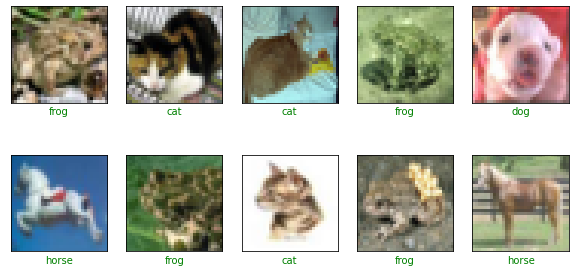

In [8]:
show_random_examples(x_train, y_train, y_train)

# Model Creation

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.models import Sequential

In [10]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(32,32,3)))
    model.add(Conv2D(24,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(24,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(128,kernel_size=4,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512,kernel_size=2,activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 24)        672       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 24)        96        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 24)        5208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 24)        96        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

# Training the model

In [12]:
hist = model.fit(x_train, y_train, batch_size=512,
                 epochs=20, validation_split=0.1,
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint(
                        'models/model_{val_accuracy:.3f}.h5',
                        monitor='val_accuracy',
                        save_best_only=True, save_weights_only=False)
                ])

Epoch 1/20
88/88 [==============================] - 14s 62ms/step - loss: 2.4302 - accuracy: 0.2737 - val_loss: 3.0711 - val_accuracy: 0.1158
Epoch 2/20
88/88 [==============================] - 4s 48ms/step - loss: 1.4793 - accuracy: 0.4777 - val_loss: 3.5757 - val_accuracy: 0.1060
Epoch 3/20
88/88 [==============================] - 4s 48ms/step - loss: 1.2387 - accuracy: 0.5614 - val_loss: 2.6409 - val_accuracy: 0.2252
Epoch 4/20
88/88 [==============================] - 4s 48ms/step - loss: 1.0760 - accuracy: 0.6183 - val_loss: 2.4309 - val_accuracy: 0.3012
Epoch 5/20
88/88 [==============================] - 4s 49ms/step - loss: 0.9448 - accuracy: 0.6678 - val_loss: 1.4784 - val_accuracy: 0.4970
Epoch 6/20
88/88 [==============================] - 4s 49ms/step - loss: 0.8409 - accuracy: 0.7081 - val_loss: 0.9654 - val_accuracy: 0.6666
Epoch 7/20
88/88 [==============================] - 4s 49ms/step - loss: 0.7606 - accuracy: 0.7320 - val_loss: 0.8368 - val_accuracy: 0.7180
Epoch 8/20
8

# Predictions

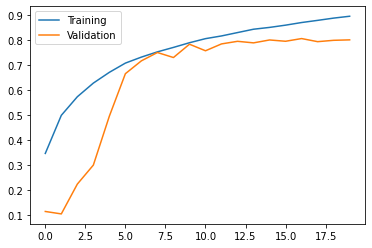

In [13]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(range(len(acc)), acc, label='Training')
plt.plot(range(len(acc)), val_acc, label='Validation')
plt.legend()

In [14]:
model = tf.keras.models.load_model('models/model_0.807.h5')

In [15]:
x_test_pred = model.predict(x_test)

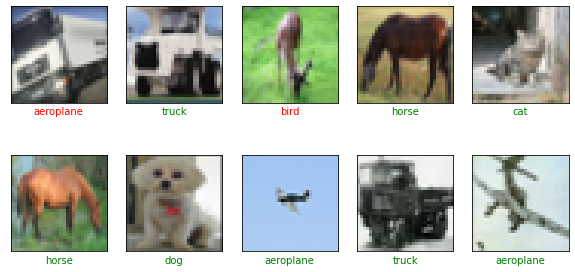

In [18]:
show_random_examples(x_test, y_test, x_test_pred)